# Value at Risk

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Create our portfolio of equities
tickers = ['AAPL','FB', 'C', 'DIS']
 
# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.25, .3, .15, .3])
 
# Set an initial investment level
initial_investment = 1000000
 
# Download closing prices
data = pdr.get_data_yahoo(tickers, start="2020-01-01", end=dt.date.today())['Close']
data.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2021-05-03,132.539993,322.579987,71.709999,185.509995
2021-05-04,127.849998,318.359985,72.330002,184.250000
2021-05-05,128.100006,315.019989,73.709999,181.509995
2021-05-06,129.740005,320.019989,74.779999,181.789993
2021-05-07,130.210007,319.079987,75.080002,184.839996


## Percentage change

In [3]:
#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

Symbols,AAPL,FB,C,DIS
Date,,,,
2021-05-03,0.008215,-0.007690,0.006597,-0.002742
2021-05-04,-0.035386,-0.013082,0.008646,-0.006792
2021-05-05,0.001955,-0.010491,0.019079,-0.014871
2021-05-06,0.012802,0.015872,0.014516,0.001543
2021-05-07,0.003623,-0.002937,0.004012,0.016778


## Create var cov matrix

In [4]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,C,DIS
Symbols,,,,
AAPL,0.000738,0.000546,0.000500,0.000354
FB,0.000546,0.000730,0.000444,0.000340
C,0.000500,0.000444,0.001447,0.000756
DIS,0.000354,0.000340,0.000756,0.000789


## Calculate the portfolio mean and standard deviation

In [5]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
 
# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
 
# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment
             
# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

stdev_investment


23605.887355707604

## Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

In [6]:
# Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
# as calculated above
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

## Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [7]:
var_1d1 = initial_investment - cutoff1
var_1d1

37462.371588654

## Value at risk over n-day time period

1 day VaR @ 95% confidence: 37462.37
2 day VaR @ 95% confidence: 52979.79
3 day VaR @ 95% confidence: 64886.73
4 day VaR @ 95% confidence: 74924.74
5 day VaR @ 95% confidence: 83768.41
6 day VaR @ 95% confidence: 91763.69
7 day VaR @ 95% confidence: 99116.12
8 day VaR @ 95% confidence: 105959.59
9 day VaR @ 95% confidence: 112387.11
10 day VaR @ 95% confidence: 118466.42
11 day VaR @ 95% confidence: 124248.63
12 day VaR @ 95% confidence: 129773.46
13 day VaR @ 95% confidence: 135072.5
14 day VaR @ 95% confidence: 140171.36
15 day VaR @ 95% confidence: 145091.14


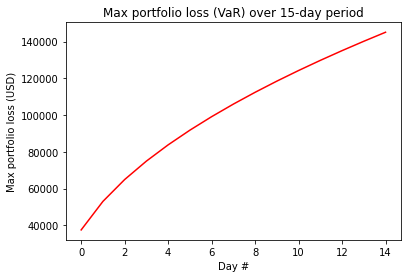

In [8]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")
